# Breast Cancer Dataset

## Summary

1. Equalize the prior

|      Dataset      | nn with peer loss |   nn  |   lr  |  svm  |  knn  | random forest |
|:-----------------:|:-----------------:|:-----:|:-----:|:-----:|:-----:|:-------------:|
| Breast (0.2, 0.2) |       0.923       | 0.958 | 0.906 | 0.991 | 0.906 |     0.962     |
| Breast (0.1, 0.3) |        0.92       | 0.934 | 0.830 | 0.915 | 0.840 |     0.849     |
| Breast (0.2, 0.4) |       0.919       | 0.862 | 0.783 | 0.802 | 0.708 |     0.792     |
| Breast (0.4, 0.4) |       0.912       | 0.852 | 0.745 | 0.792 | 0.726 |     0.717     |

2. Do not equalize the prior (pos: 0.37, neg: 0.63)

|      Dataset      | nn with peer loss |   nn  |   lr  |  svm  |  knn  | random forest |
|:-----------------:|:-----------------:|:-----:|:-----:|:-----:|:-----:|:-------------:|
| Breast (0.2, 0.2) |       0.937       | 0.956 | 0.926 | 0.915 | 0.909 |     0.94      |
| Breast (0.1, 0.3) |       0.919       | 0.862 | 0.888 | 0.802 | 0.903 |     0.792     |
| Breast (0.2, 0.4) |       0.939       | 0.897 | 0.841 | 0.991 | 0.818 |     0.861     |
| Breast (0.4, 0.4) |       0.929       | 0.877 | 0.774 | 0.869 | 0.657 |     0.744     |

## Describe

| Total | Positive | Attributes | Normalized |
|:-----:|:--------:|:----------:|:----------:|
|  569  |   0.37   |     30     |     Not    |

In [2]:
from utils.dataloader import DataLoader
df = DataLoader('breast').df
df.target.describe()

count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [3]:
df.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## With prior equalization

In [4]:
from runner import run

arg_dict = {
    'dataset': 'breast', 
    'lr': 0.001, 
    'hidsize': 8, 
    'episodes': 100, 
    'batchsize': 10, 
    'test_size': 0.25,
    'dropout': 0.,
    'normalize': True,
    'equalize_prior': True,
    
}

$e_0=0, e_1=0$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'e0': 0, 'e1': 0}


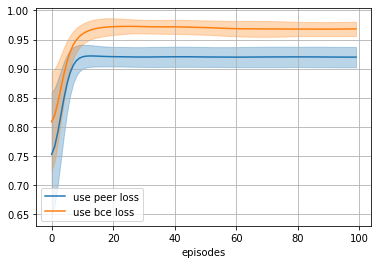

--------------------------------------
| knn                     | 0.972    |
| logistic regression     | 0.981    |
| nn                      | 0.973    |
| nn with peer prediction | 0.922    |
| random forest           | 0.981    |
| svm                     | 0.981    |
--------------------------------------


In [2]:
arg_dict.update({'e0': 0, 'e1': 0})
run(arg_dict.copy())

$e_0=0.2, e_1=0.2$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'e0': 0.2, 'e1': 0.2}


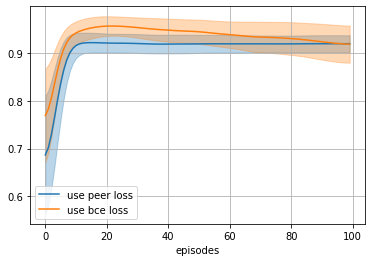

--------------------------------------
| knn                     | 0.906    |
| logistic regression     | 0.906    |
| nn                      | 0.958    |
| nn with peer prediction | 0.923    |
| random forest           | 0.962    |
| svm                     | 0.991    |
--------------------------------------


In [6]:
arg_dict.update({'e0': 0.2, 'e1': 0.2})
run(arg_dict.copy())

$e_0=0.1, e_1=0.3$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'e0': 0.1, 'e1': 0.3}


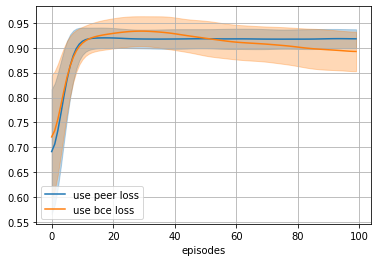

--------------------------------------
| knn                     | 0.84     |
| logistic regression     | 0.83     |
| nn                      | 0.934    |
| nn with peer prediction | 0.92     |
| random forest           | 0.849    |
| svm                     | 0.915    |
--------------------------------------


In [3]:
arg_dict.update({'e0': 0.1, 'e1': 0.3})
run(arg_dict.copy())

$e_0=0.2, e_1=0.4$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'e0': 0.2, 'e1': 0.4}


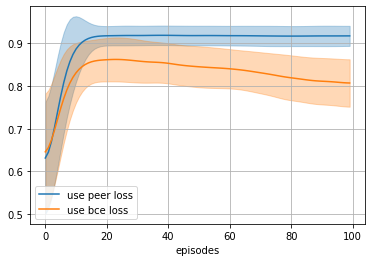

--------------------------------------
| knn                     | 0.708    |
| logistic regression     | 0.783    |
| nn                      | 0.862    |
| nn with peer prediction | 0.919    |
| random forest           | 0.792    |
| svm                     | 0.802    |
--------------------------------------


In [4]:
arg_dict.update({'e0': 0.2, 'e1': 0.4})
run(arg_dict.copy())

$e_0 = 0.4, e_1 = 0.4$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'e0': 0.4, 'e1': 0.4}


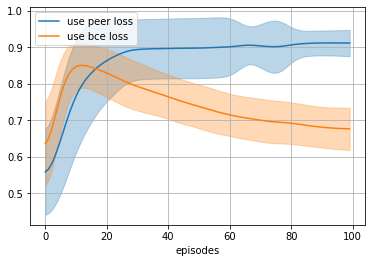

--------------------------------------
| knn                     | 0.726    |
| logistic regression     | 0.745    |
| nn                      | 0.852    |
| nn with peer prediction | 0.912    |
| random forest           | 0.717    |
| svm                     | 0.792    |
--------------------------------------


In [5]:
arg_dict.update({'e0': 0.4, 'e1': 0.4})
run(arg_dict.copy())

## No prior equalization

In [5]:
from runner import run

arg_dict = {
    'dataset': 'breast', 
    'lr': 0.001, 
    'hidsize': 8, 
    'episodes': 100, 
    'batchsize': 10, 
    'test_size': 0.25,
    'dropout': 0.,
    'normalize': True,
    'equalize_prior': False,
}

$e_0=0, e_1=0$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'normalize': True, 'equalize_prior': False, 'e0': 0, 'e1': 0}


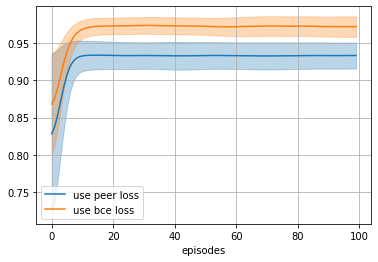

--------------------------------------
| knn                     | 0.964    |
| logistic regression     | 0.975    |
| nn                      | 0.974    |
| nn with peer prediction | 0.934    |
| random forest           | 0.956    |
| svm                     | 0.973    |
--------------------------------------


In [6]:
arg_dict.update({'e0': 0, 'e1': 0})
run(arg_dict.copy())

$e_0=0.2, e_1=0.2$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'normalize': True, 'equalize_prior': False, 'e0': 0.2, 'e1': 0.2}


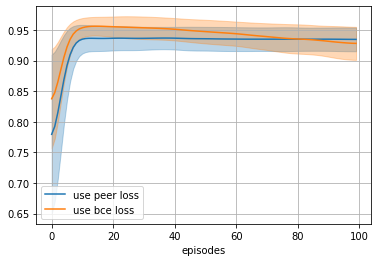

--------------------------------------
| knn                     | 0.909    |
| logistic regression     | 0.926    |
| nn                      | 0.956    |
| nn with peer prediction | 0.937    |
| random forest           | 0.94     |
| svm                     | 0.954    |
--------------------------------------


In [7]:
arg_dict.update({'e0': 0.2, 'e1': 0.2})
run(arg_dict.copy())

$e_0=0.1, e_1=0.3$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'normalize': True, 'equalize_prior': False, 'e0': 0.1, 'e1': 0.3}


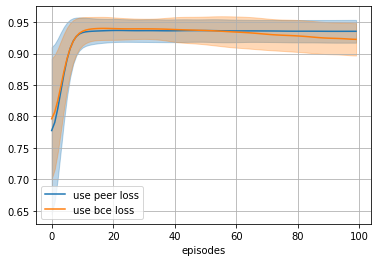

--------------------------------------
| knn                     | 0.903    |
| logistic regression     | 0.888    |
| nn                      | 0.94     |
| nn with peer prediction | 0.937    |
| random forest           | 0.912    |
| svm                     | 0.932    |
--------------------------------------


In [8]:
arg_dict.update({'e0': 0.1, 'e1': 0.3})
run(arg_dict.copy())

$e_0=0.2, e_1=0.4$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'normalize': True, 'equalize_prior': False, 'e0': 0.2, 'e1': 0.4}


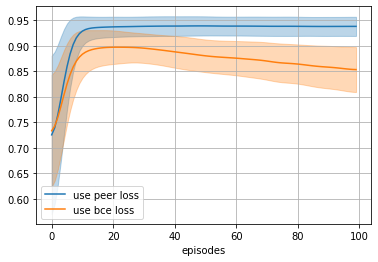

--------------------------------------
| knn                     | 0.818    |
| logistic regression     | 0.841    |
| nn                      | 0.897    |
| nn with peer prediction | 0.939    |
| random forest           | 0.861    |
| svm                     | 0.876    |
--------------------------------------


In [9]:
arg_dict.update({'e0': 0.2, 'e1': 0.4})
run(arg_dict.copy())

$e_0 = 0.4, e_1 = 0.4$

{'dataset': 'breast', 'lr': 0.001, 'hidsize': 8, 'episodes': 100, 'batchsize': 10, 'test_size': 0.25, 'dropout': 0.0, 'normalize': True, 'equalize_prior': False, 'e0': 0.4, 'e1': 0.4}


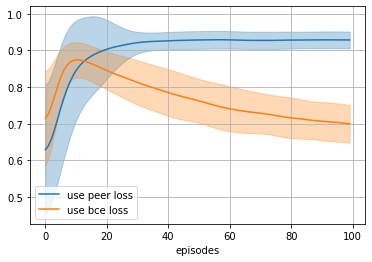

--------------------------------------
| knn                     | 0.657    |
| logistic regression     | 0.774    |
| nn                      | 0.877    |
| nn with peer prediction | 0.929    |
| random forest           | 0.744    |
| svm                     | 0.869    |
--------------------------------------


In [10]:
arg_dict.update({'e0': 0.4, 'e1': 0.4})
run(arg_dict.copy())